In [48]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def file_path(question, ext):
    """
    This Function will be used to specify the csv file of the imported database
    ----
    Parameters :
    1. questions : String -> This is the Question that will be promt user to input file
    2. extension : String -> Allowed file extension, in this case is csv
    """
    while True:
        try:
            file = Path(input(question))
            if file.exists() and file.is_file and file.suffix in ext:
                return file
        except:
            print('File not suitable, please retry')

## INPUT Dataset
CMD Sangatta Data Historical from Jan 2023 to Feb 2025

In [49]:
csv = file_path('Masukkan File CSV  : ','.csv')
dataset = pd.read_csv(csv)
dataset


Masukkan File CSV  :  C:\Users\yudhia\Documents\GitHub\FuelPrediction\Dataframe\CMDS\CMDData_Pandas16102025A.csv


,Month,OB (Bcm),Coal (Ton),Distance OB (KM),Distance Coal (KM),Fuel
0,Jan-22,15785978.69,1504937.857,3.363892,12.457640,27598363
1,Feb-22,14229029.70,1421449.418,3.453830,12.524341,24890534
2,Mar-22,17273695.86,1582767.383,3.587240,12.735087,29420177
3,Apr-22,15962613.40,1405327.557,3.863982,12.475749,29163388
4,May-22,17360855.02,1531826.016,3.935453,14.520040,30945970
5,Jun-22,20038812.27,1949512.218,4.068769,13.875285,36413097
6,Jul-22,18045041.27,2334649.639,4.000501,12.917779,35028275
7,Aug-22,19562869.05,2305210.910,4.126488,14.122696,37348603
8,Sep-22,17912757.98,2147737.561,4.228515,13.964810,34909816
9,Oct-22,14470692.72,1726845.212,4.412500,13.690950,33179670


## Checking for Linearity
Before you execute a linear regression model, it is advisable to validate that certain assumptions are met.

As noted earlier, you may want to check that a linear relationship exists between the dependent variable and the independent variable/s.

To perform a quick linearity check, you can use scatter diagrams (utilizing the matplotlib library).

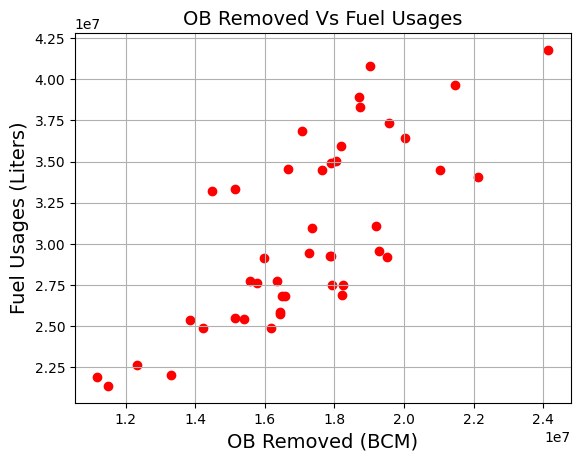

In [50]:
plt.scatter(dataset['OB (Bcm)'], dataset['Fuel'], color='red')
plt.title('OB Removed Vs Fuel Usages', fontsize=14)
plt.xlabel('OB Removed (BCM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

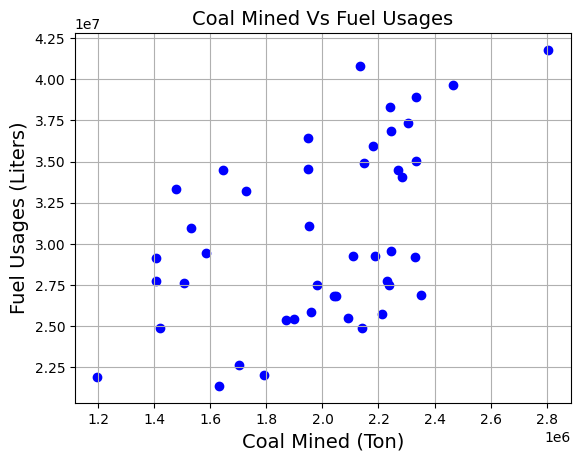

In [51]:
plt.scatter(dataset['Coal (Ton)'], dataset['Fuel'], color='blue')
plt.title('Coal Mined Vs Fuel Usages', fontsize=14)
plt.xlabel('Coal Mined (Ton)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

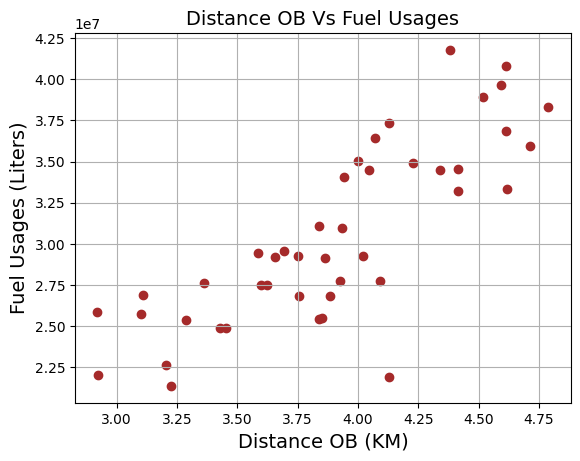

In [52]:
plt.scatter(dataset['Distance OB (KM)'], dataset['Fuel'], color='brown')
plt.title('Distance OB Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance OB (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

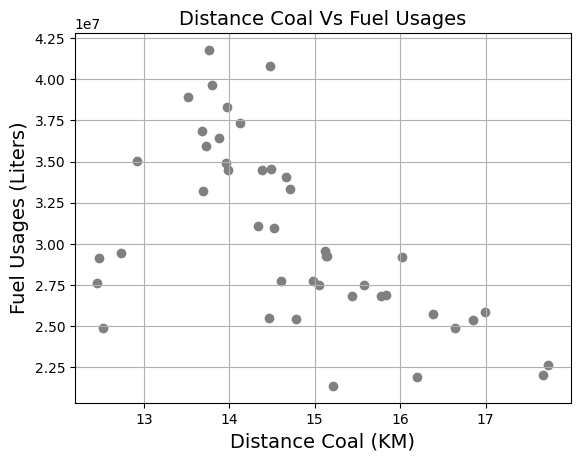

In [53]:
plt.scatter(dataset['Distance Coal (KM)'], dataset['Fuel'], color='gray')
plt.title('Distance Coal Vs Fuel Usages', fontsize=14)
plt.xlabel('Distance Coal (KM)', fontsize=14)
plt.ylabel('Fuel Usages (Liters)', fontsize=14)
plt.grid(True)
plt.show()

## From Linearity test 
We found that OB Removed, Coal Mined and OB Distance have linier relantionship with Fuel Usages

## Checking Outliers
Check Correlation before removing Outliers

In [54]:
dataset = dataset.drop(['Month'], axis=1)

In [55]:
correlations = dataset.corr()
correlations['Fuel'].round(2)

OB (Bcm)              0.75
Coal (Ton)            0.50
Distance OB (KM)      0.81
Distance Coal (KM)   -0.58
Fuel                  1.00
Name: Fuel, dtype: float64

## From Corelation above 
We found that OB, Coal and OB Distance have corelation to Fuel, which have corelation point >= 0.5

In [56]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut
import statsmodels.api as sm
import seaborn as sns

## Checking Outliers

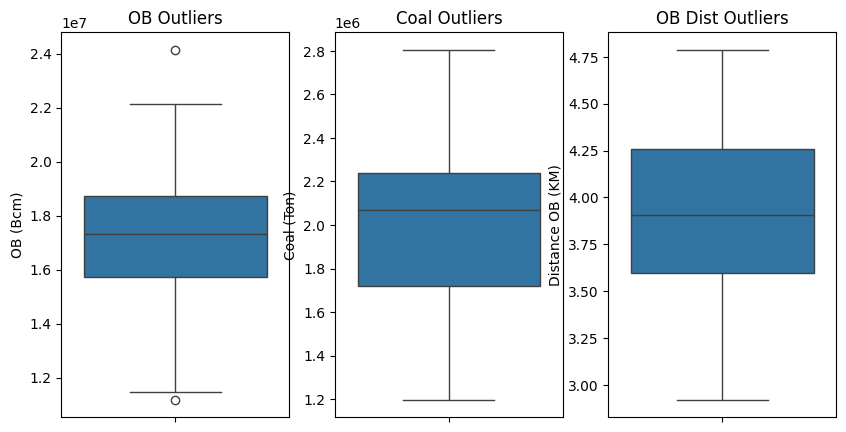

In [58]:
# Create box plots for each feature
plt.figure(figsize=(10, 5))

# OB Boxplot
plt.subplot(1, 3, 1)
sns.boxplot(y=dataset['OB (Bcm)'])
plt.title("OB Outliers")

# Coal Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(y=dataset['Coal (Ton)'])
plt.title("Coal Outliers")

# OB Dist Boxplot
plt.subplot(1, 3, 3)
sns.boxplot(y=dataset['Distance OB (KM)'])
plt.title("OB Dist Outliers")

plt.show()

In [60]:
# Compute IQR
Q1 = dataset[['OB (Bcm)', 'Coal (Ton)','Distance OB (KM)']].quantile(0.25)
Q3 = dataset[['OB (Bcm)', 'Coal (Ton)','Distance OB (KM)']].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = ((dataset[['OB (Bcm)', 'Coal (Ton)','Distance OB (KM)']] < lower_bound) | (dataset[['OB (Bcm)', 'Coal (Ton)','Distance OB (KM)']] > upper_bound))

# Get row indices of outliers
outlier_indices = dataset[outliers.any(axis=1)].index
outlier_masks = dataset[outliers.any(axis=1)]
print("Outlier indices:", outlier_indices)

outlier_rows = dataset.loc[outlier_indices]
print(outlier_rows)

Outlier indices: Index([19, 35], dtype='int64')
       OB (Bcm)   Coal (Ton)  Distance OB (KM)  Distance Coal (KM)      Fuel
19  24151259.39  2806058.912          4.379095           13.765931  41783822
35  11188003.51  1197227.368          4.127576           16.200381  21882734


## Clean Dataset without Outliers

In [61]:
dataset = dataset.drop(index=outlier_indices)  # Keep only rows without outliers
dataset

,OB (Bcm),Coal (Ton),Distance OB (KM),Distance Coal (KM),Fuel
0,15785978.69,1504937.857,3.363892,12.457640,27598363
1,14229029.70,1421449.418,3.453830,12.524341,24890534
2,17273695.86,1582767.383,3.587240,12.735087,29420177
3,15962613.40,1405327.557,3.863982,12.475749,29163388
4,17360855.02,1531826.016,3.935453,14.520040,30945970
5,20038812.27,1949512.218,4.068769,13.875285,36413097
6,18045041.27,2334649.639,4.000501,12.917779,35028275
7,19562869.05,2305210.910,4.126488,14.122696,37348603
8,17912757.98,2147737.561,4.228515,13.964810,34909816
9,14470692.72,1726845.212,4.412500,13.690950,33179670


In [62]:
correlations = dataset.corr()
correlations['Fuel'].round(3)

OB (Bcm)              0.696
Coal (Ton)            0.387
Distance OB (KM)      0.859
Distance Coal (KM)   -0.556
Fuel                  1.000
Name: Fuel, dtype: float64

## Features & Target
Features (x) : Independent Variables = OB & OB Distance
Target (y) : Dependent Variable = Fuel

In [70]:
x = dataset[['OB (Bcm)','Distance OB (KM)']]
y = dataset['Fuel']
 
# Split dataset (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

In [71]:
# ==============================
# Linear Regression (sklearn)
# ==============================
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [72]:
# Predictions
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

In [73]:
# Metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Cross-Validation (5-fold)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
loo = LeaveOneOut()
cv_scores = cross_val_score(regr, X_train, y_train, cv=kf, scoring='r2')

# Print Results
print("\n Model Performance Metrics:")
print(f"Train MSE: {train_mse:.3f} | Test MSE: {test_mse:.3f}")
print(f"Train MAE: {train_mae:.3f} | Test MAE: {test_mae:.3f}")
print(f"Train R² Score: {train_r2:.3f} | Test R² Score: {test_r2:.3f}")

print("\n Cross-Validation Results:")
print(f"R² Scores for each fold: {cv_scores.round(3)}")
print(f"Mean R² Score: {cv_scores.mean():.3f} | Std Dev: {cv_scores.std():.3f}")


 Model Performance Metrics:
Train MSE: 3549303456962.150 | Test MSE: 3742776478159.324
Train MAE: 1561453.785 | Test MAE: 1628890.447
Train R² Score: 0.877 | Test R² Score: 0.793

 Cross-Validation Results:
R² Scores for each fold: [-0.107  0.807  0.758  0.831  0.991]
Mean R² Score: 0.656 | Std Dev: 0.389


In [74]:
# ==============================
# Linear Regression (statsmodels)
# ==============================

regr = linear_model.LinearRegression()
regr.fit(x, y)
print("Final Model Intercept:", regr.intercept_.round(3))
print("Final Model Coefficients:", regr.coef_.round(3))

X_const = sm.add_constant(x)  # Add constant for intercept
model = sm.OLS(y, X_const).fit()
print("\n📌 Statsmodels Regression Summary:")
print(model.summary())

Final Model Intercept: -11600908.666
Final Model Coefficients: [8.73000000e-01 6.97529399e+06]

📌 Statsmodels Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                   Fuel   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     122.5
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           1.53e-17
Time:                        15:48:18   Log-Likelihood:                -666.34
No. Observations:                  42   AIC:                             1339.
Df Residuals:                      39   BIC:                             1344.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define features (exclude 'Fuel' since it's the target variable)
features = ['OB (Bcm)','Coal (Ton)','Distance OB (KM)']
X = dataset[features]  

# Add a constant column for intercept
X = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

            Feature        VIF
0             const  89.923461
1          OB (Bcm)   1.999247
2        Coal (Ton)   1.691013
3  Distance OB (KM)   1.251429


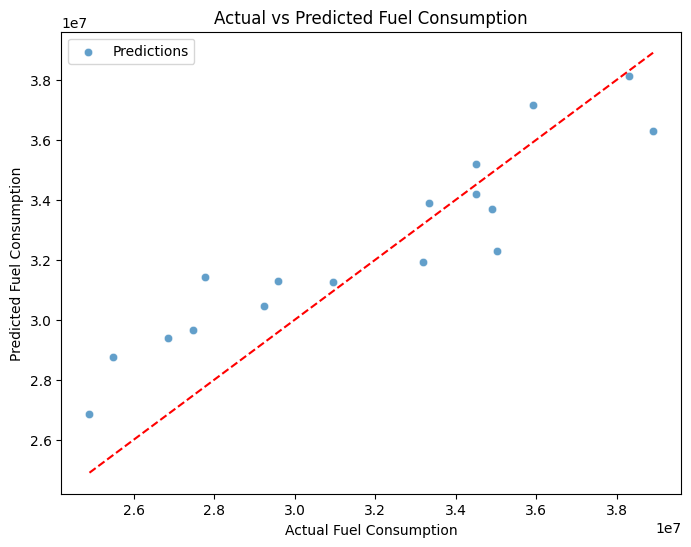

In [76]:
# ==============================
# Plot: Actual vs Predicted
# ==============================
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.7, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Fuel Consumption")
plt.ylabel("Predicted Fuel Consumption")
plt.title("Actual vs Predicted Fuel Consumption")
plt.legend()
plt.show()